## *You need to finish code where "..." exists and add some Markdown cells to give answers based on the outputs when necessary*

# Question 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def func(X):
    x, y = X
    return (x**4 - x**2 + y**2 + 2*x*y - 2)

def first_derivative(X):
    x, y = X
    df_dx = 4*x**3 - 2*x + 2*y
    df_dy = 2*y + 2*x
    return np.array([df_dx, df_dy])

def second_derivative(X):
    x, y = X
    df2_dx2 = 12*x**2 - 2
    df2_dy2 = 2
    df2_dxdy = 2
    return np.array([[df2_dx2, df2_dxdy], [df2_dxdy, df2_dy2]])

## (a)

In [2]:
points = [(1.0, -1.0), (-1.0, 1.0), (0.0, 0.0), (0.0, -2.0)]

for X in points:
    print("Point:", X)
    print("Gradient:", first_derivative(X))
    eigenvalues, eigenvectors = np.linalg.eig(second_derivative(X))
    print("Hessian eigenvalues:", eigenvalues) # use np.linalg.eig function to get eigenvalues and eigenvectors
    print("----")

Point: (1.0, -1.0)
Gradient: [0. 0.]
Hessian eigenvalues: [10.47213595  1.52786405]
----
Point: (-1.0, 1.0)
Gradient: [0. 0.]
Hessian eigenvalues: [10.47213595  1.52786405]
----
Point: (0.0, 0.0)
Gradient: [0. 0.]
Hessian eigenvalues: [-2.82842712  2.82842712]
----
Point: (0.0, -2.0)
Gradient: [-4. -4.]
Hessian eigenvalues: [-2.82842712  2.82842712]
----


Points (1.0, -1.0) and (-1.0, 1.0) are minimas because they have 2 posiitve eigenvalues. 
Points (0.0, 0.0) and (0.0, -2.0) are saddle points because they have one positive and one negative eigenvalue.

## (b)

In [3]:
original_point = np.array([1.5, 1.5])
new_point = original_point - 0.1 * first_derivative((1.5, 1.5)) # should be [0.15, 0.9]

print(new_point)

if new_point[1] < original_point[1]:
    print("This is a good step")
else:
    print("This is a bad step")


[0.15 0.9 ]
This is a good step


Since this is a good step, for the next step, we can increase the step size.

## (c)

In [4]:
def steepest_descent(func, first_derivative, starting_point, step_size, tol):
    """
    Steepest Descent
    
    Parameters
    ----------
    func: Callable
        Function to be minimized
    first_derivative: Callable
        First derivative of the function to be minimized
    starting_point: np.ndarray
        Starting point of minimization
    step_size: float
        Size of each gradient descent step
    tol: float
        If the norm of the gradient is smaller than tol, the minimization will terminate
    
    Returns
    -------
    res: dict
        Optimization result
    """
    deriv = first_derivative(starting_point)
    count = 0
    visited = []
    while np.linalg.norm(deriv) > tol and count < 1e6:
        new_point = starting_point - step_size * deriv
        if func(new_point) < func(starting_point):
            starting_point = new_point
            visited.append(starting_point)
            deriv = first_derivative(starting_point)
            step_size *= 1.2
        else:
            step_size /= 2
        count += 1
    return {
        "x": starting_point,
        "evaluation": func(starting_point),
        "path": np.array(visited)
    }

In [5]:
res = steepest_descent(func, first_derivative, (1.5, 1.5), 0.1, 10**-5) 
res

{'x': array([-0.99999852,  0.99999607]),
 'evaluation': -2.999999999985186,
 'path': array([[ 0.15      ,  0.9       ],
        [-0.03162   ,  0.648     ],
        [-0.22733235,  0.47048256],
        [-0.4603766 ,  0.38644985],
        [-0.73063964,  0.41710875],
        [-0.91361447,  0.57314178],
        [-0.89067253,  0.77647099],
        [-0.98168777,  0.81739147],
        [-0.94167921,  0.88803587],
        [-1.0240441 ,  0.91571465],
        [-0.95964931,  0.94925202],
        [-1.01216804,  0.95311466],
        [-0.98795692,  0.96627781],
        [-0.99481157,  0.9720766 ],
        [-0.99412388,  0.97937406],
        [-0.99741632,  0.98505533],
        [-0.99646125,  0.99076871],
        [-1.00111334,  0.9939261 ],
        [-0.99723697,  0.99631795],
        [-1.00126535,  0.99668496],
        [-0.99895278,  0.99778247],
        [-0.99981882,  0.99811897],
        [-0.99948229,  0.99870549],
        [-1.00001741,  0.99902712],
        [-0.99975409,  0.99927314],
        [-0.9999

Function for drawing path:

In [6]:
def draw_path(func, path, x_min=-2, x_max=2, y_min=-2, y_max=2):
    a = np.linspace(x_min, x_max, 100)
    b = np.linspace(y_min, y_max, 100)
    x, y = np.meshgrid(a, b)
    z = func((x, y))
    fig, ax = plt.subplots()
    contour = ax.contour(x, y, z, 50)
    plt.colorbar(contour)
    ax.plot(path[:, 0], path[:, 1], color='red')
    print("Length of the path:", path.size)

Length of the path: 82


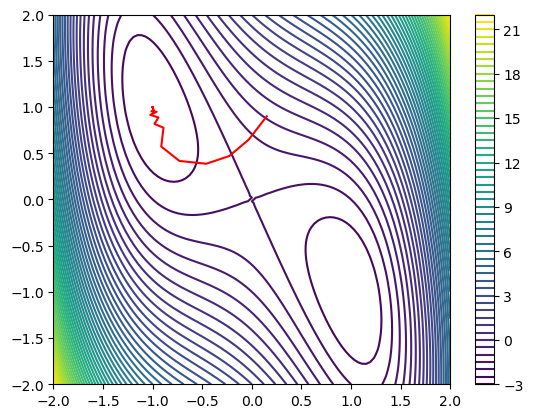

In [7]:
# draw path
draw_path(func, res["path"])

## (d)

In [8]:
from scipy.optimize import minimize

# minimize with CG
# please refer to Tutorial 1 or Scipy Documentation for usage of `minimize` function
res = minimize(
        func,
        np.array([1.5, 1.5]),
        method = "CG",
        options={'gtol': 1e-5, 'disp': True}
    )
print(res.x)

Optimization terminated successfully.
         Current function value: -3.000000
         Iterations: 9
         Function evaluations: 78
         Gradient evaluations: 26
[-0.99999984  0.99999929]


In [9]:
# minimize with BFGS
res = minimize(
        func,
        np.array([1.5, 1.5]),
        method = "BFGS",
        options={'gtol': 1e-5, 'disp': True}
    )
print(res.x)

Optimization terminated successfully.
         Current function value: -3.000000
         Iterations: 7
         Function evaluations: 24
         Gradient evaluations: 8
[ 0.99999979 -0.9999998 ]


Yes, congugate gradient and BFGS are more efficient than steepest descent, taking 9 and 7 steps respectively.

## Question 2

In [10]:
def Rosenbrock(X):
    x, y = X
    return ((1 - x)**2 + 10*(y - x**2)**2)

def Rosenbrock_grad(X):
    x, y = X
    df_dx = -2*(1-x) - 40*x*(y-x**2)
    df_dy = 20*(y - x**2)
    return np.array([df_dx, df_dy])

## (a)

Length of the path: 2408


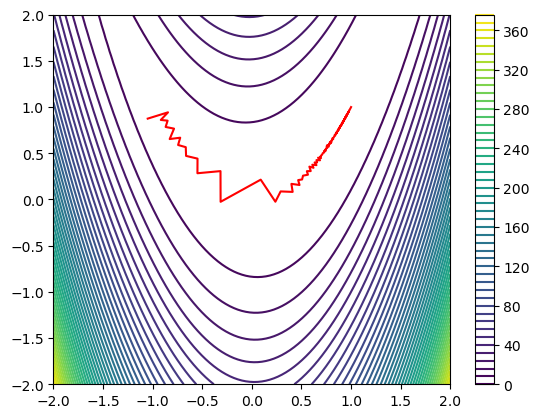

In [11]:
original_point = np.array([-0.5, 1.5])
# minimization
res = steepest_descent(Rosenbrock, Rosenbrock_grad, original_point, 0.1, 10**-5) 
# draw path
draw_path(Rosenbrock, res["path"])

## (b)

In [12]:
def sgd(func, first_derivative, starting_point, step_size, tol, stochastic_injection=0):
    """
    Stochastic Gradient Descent
    
    Parameters
    ----------
    func: Callable
        Function to be minimized
    first_derivative: Callable
        First derivative of the function to be minimized
    starting_point: np.ndarray
        Starting point of minimization
    step_size: float
        Size of each gradient descent step
    tol: float
        If the norm of the gradient is smaller than tol, the minimization will terminate
    stochastic_injection: int
        Enable stochastic gradient (set to 1) or not (set to 0).
    
    Returns
    -------
    res: dict
        Optimization result
    """
    deriv = first_derivative(starting_point)
    count = 0
    visited = []
    while np.linalg.norm(deriv) > tol and count < 1e6:
        if stochastic_injection > 0:
            random_vector = np.random.random(len(starting_point)) * 2 - 1
            stochastic_deriv = np.linalg.norm(deriv) * random_vector / np.linalg.norm(random_vector)
        else:
            stochastic_deriv = np.zeros(len(starting_point))
        direction = -(deriv + stochastic_injection * stochastic_deriv)
        new_point = starting_point + step_size * direction

        if func(new_point) < func(starting_point):
            visited.append(starting_point)
            starting_point = new_point
            deriv = first_derivative(starting_point)
            step_size *= 1.2
        else:
            step_size /= 2
        count += 1
    return {
        "x": starting_point,
        "evaluation": func(starting_point),
        "path": np.array(visited)
    }

In [13]:
original_point = np.array([-0.5, 1.5])
res = sgd(Rosenbrock, Rosenbrock_grad, original_point, 0.1, 10**-5, stochastic_injection=1) # don't forget to turn on stochastic_injection

Length of the path: 3736


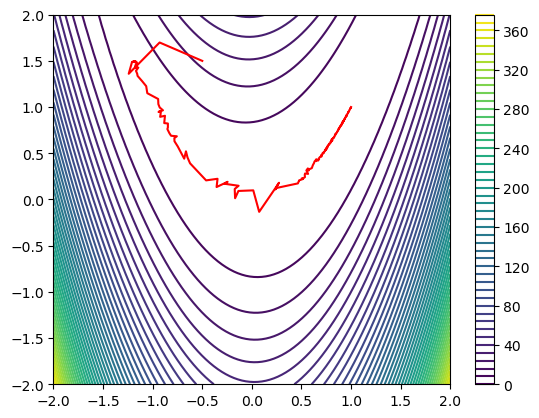

In [14]:
# draw path
draw_path(Rosenbrock, res["path"])

## (c)

In [15]:
# use scipy.optimize.minimize
from scipy.optimize import minimize

print("Minimizing with CG")
res = minimize(
        Rosenbrock,
        original_point,
        method = "CG",
        options={'gtol': 1e-5, 'disp': True}
    )
print(res.x)

Minimizing with CG
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 132
         Gradient evaluations: 44
[0.99999955 0.99999908]


In [16]:
print("Minimizing with BFGS")
res =  minimize(
        Rosenbrock,
        original_point,
        method = "BFGS",
        options={'gtol': 1e-5, 'disp': True}
    )
print(res.x)

Minimizing with BFGS
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 93
         Gradient evaluations: 31
[0.99999959 0.99999917]


The SGD algorithm performs significantly worse than CG and BFGS on the Rosenbrock function. SGD took 3736 steps, whereas CG and BFGS took 20 and 22 steps respectively. 


## (d)

No, you cannot draw a firm conclusion on the outcome with just one run of each method. This is because there may be variation in optimization performance across multiple runs. This variation in performance cannot be seen through just one run and thus is not a conclusive metric. 

## (e)

In [17]:
def statistics_test(method, args, times, global_minimum=None):
    result = []
    for n in range(times):
        res = method(*args)
        if global_minimum is not None and np.linalg.norm(res['x'] - global_minimum) > 1e-3:
            continue
        result.append(len(res['path']))
    
    msg = f"Running {times} times: reach global minimum {len(result)} times"
    if len(result) > 0:
        avg = np.mean(result) # calulate average
        std = np.std(result) # calculate standard deviation
        msg += f", average {int(avg)} steps with variance {std:.2f}"
    print(msg)

    
starting_points = [
    original_point,
    np.array([0.0, 1.0]),
    np.array([-1.0, 1.0]),
    np.array([1.5, 0.5])
]

In [18]:
# test stochastic gradient descent
for pt in starting_points:
    statistics_test(
        sgd,
        (Rosenbrock, Rosenbrock_grad, pt, 0.1, 10**-5, 1), 
        20 # run the SGD for 20 times
    )

Running 20 times: reach global minimum 20 times, average 1719 steps with variance 52.85
Running 20 times: reach global minimum 20 times, average 1669 steps with variance 276.29
Running 20 times: reach global minimum 20 times, average 1766 steps with variance 65.47
Running 20 times: reach global minimum 20 times, average 1769 steps with variance 236.76


In [19]:
# test steepest descent
for pt in starting_points:
    statistics_test(
        steepest_descent,
        (Rosenbrock, Rosenbrock_grad, pt, 0.1, 10**-5), 
        20 # run the SD for 20 times
    )

Running 20 times: reach global minimum 20 times, average 1204 steps with variance 0.00
Running 20 times: reach global minimum 20 times, average 1204 steps with variance 0.00
Running 20 times: reach global minimum 20 times, average 1218 steps with variance 0.00
Running 20 times: reach global minimum 20 times, average 1219 steps with variance 0.00


In [20]:
# run CG for different starting points
for pt in starting_points:
    minimize(
        Rosenbrock,
        pt,
        method = "CG",
        options={'gtol': 1e-5, 'disp': True}
    )

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 132
         Gradient evaluations: 44
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 99
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 87
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 79
         Gradient evaluations: 26


In [21]:
# run BFGS for different statring points
for pt in starting_points:
        minimize(
        Rosenbrock,
        pt,
        method = "BFGS",
        options={'gtol': 1e-5, 'disp': True}
    )

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 93
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 48
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 81
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 66
         Gradient evaluations: 22


The non-stochastic methods, including steepest descent, CG, and BFGS, all perform better on the Rosenbrock function than stochastic gradient descent. For example, point 2 takes an average of 1669 steps to converge in SGD, but takes only 1204, 13, and 13 steps for steepest descent, CG, and BFGS respectively. 


# Question 3

In [29]:
def Camel(X):
    x, y = X
    return 2*x**2 - 1.05 * x ** 4 + x**6 / 6 + x*y + y**2

def Camel_grad(X):
    x, y = X
    df_dx = 4*x - 4.2*x**3 + x**5 + y
    df_dy = x + 2*y
    return np.array([df_dx, df_dy])

## (a)

In [23]:
original_point = np.array([-1.5, -1.5])

starting_points = [
    original_point,
    np.array([0.0, 1.0]),
    np.array([-1.0, 1.0]),
    np.array([1.5, 0.5])
]

# test SGD
for pt in starting_points:
    statistics_test(
        sgd,
        (Camel, Camel_grad, pt, 0.1, 10**-5, 1), 
        20 # run the SGD for 20 times
    )

Running 20 times: reach global minimum 20 times, average 34 steps with variance 12.81
Running 20 times: reach global minimum 20 times, average 35 steps with variance 7.16
Running 20 times: reach global minimum 20 times, average 40 steps with variance 27.12
Running 20 times: reach global minimum 20 times, average 57 steps with variance 35.41


In [24]:
# run CG for different starting points
# don't forget to check if the global minium is reached
for pt in starting_points:
    minimize(
        Camel,
        pt,
        method = "CG",
        options={'gtol': 1e-5, 'disp': True}
    )

Optimization terminated successfully.
         Current function value: 0.298638
         Iterations: 7
         Function evaluations: 63
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 36
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.298638
         Iterations: 6
         Function evaluations: 63
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.298638
         Iterations: 7
         Function evaluations: 42
         Gradient evaluations: 14


In [25]:
# run BFGS for different statring points
# don't forget to check if the global minium is reached
for pt in starting_points:
    minimize(
        Camel,
        pt,
        method = "BFGS",
        options={'gtol': 1e-5, 'disp': True}
    )

Optimization terminated successfully.
         Current function value: 0.298638
         Iterations: 8
         Function evaluations: 30
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 24
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.298638
         Iterations: 8
         Function evaluations: 57
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.298638
         Iterations: 8
         Function evaluations: 30
         Gradient evaluations: 10


On average, SGD performed worse on the Camel function than CG and BFGS. 

## (b)

In [26]:
def sgdm(func, first_derivative, starting_point, step_size, tol, stochastic_injection=0, momentum=0):
    """
    Stochastic Gradient Descent with Momentum
    
    Parameters
    ----------
    func: Callable
        Function to be minimized
    first_derivative: Callable
        First derivative of the function to be minimized
    starting_point: np.ndarray
        Starting point of minimization
    step_size: float
        Size of each gradient descent step
    tol: float
        If the norm of the gradient is smaller than tol, the minimization will terminate
    stochastic_injection: int
        Enable stochastic gradient (set to 1) or not (set to 0).
    momentum: float
        Momentum (\eta) value in SGDM algorithm
    
    Returns
    -------
    res: dict
        Optimization result
    """
    
    deriv = first_derivative(starting_point)
    count = 0
    visited = []
    previous_direction = np.zeros(len(starting_point))
    while np.linalg.norm(deriv) > tol and count < 1e6:
        if stochastic_injection > 0:
            random_vector = np.random.random(len(starting_point)) * 2 - 1
            stochastic_deriv = np.linalg.norm(deriv) * random_vector / np.linalg.norm(random_vector)
        else:
            stochastic_deriv = np.zeros(len(starting_point))
        direction = -(deriv + stochastic_injection * stochastic_deriv)
        new_point = starting_point + step_size * (momentum * previous_direction + direction)

        if func(new_point) < func(starting_point):
            visited.append(starting_point)
            starting_point = new_point
            previous_direction = direction
            deriv = first_derivative(starting_point)
            step_size *= 1.2
        else:
            if step_size < 1e-5:
                previous_direction = np.zeros(len(starting_point))
            else:
                step_size /= 2
        count += 1
    
    return {
        "x": starting_point,
        "evaluation": func(starting_point),
        "path": np.array(visited)
    }

In [28]:
# test SGDM
for pt in starting_points:
    statistics_test(
        sgdm,
        (Camel, Camel_grad, pt, 0.1, 1e-5, 1, 1), 
        20 # run the SGD for 20 times
    )

Running 20 times: reach global minimum 20 times, average 34611 steps with variance 45067.15
Running 20 times: reach global minimum 20 times, average 87 steps with variance 28.83
Running 20 times: reach global minimum 20 times, average 59823 steps with variance 36904.52
Running 20 times: reach global minimum 20 times, average 55158 steps with variance 35183.76


On average, SGDM took more steps than SGD, CG, and BFGS. This means it was a worse result. 